# <center>Laboratorium 11<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod:  
    1. Metoda Trapezów - [trapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz)
    2. Metoda Simpsona - [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) 
    3. Metoda Romberga - [romb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)
    2. [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html#scipy.integrate.romberg)
    3. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

***Zad 1***

Nie. Funkcja jest postaci log(a), a jak wiadomo a musi być większe od 0 - tylko że tan(x) + 1 dla pewnych x osiąga wartości mniejsze od 0. Ponadto tan(x) dla x zmierzających do k*pi, gdzie k to liczba całkowita, dąży do +- nieskończoności, a log może i spowalnia ogólny przyrost funkcji, ale dalej sięga on nieskończoności.
(Funkcja nie na wszyskich przedziałach jest ograniczona, ciągła i różniczkowalna)

In [414]:
import numpy as np
import scipy.integrate as sci
import scipy as sc
import matplotlib.pyplot as plt

N = [2**8 + 1, 2**9 + 1, 2**10 + 1, 2**11 + 1, 2**12 + 1, 2**13 + 1, 2**14 + 1, 2**15 + 1]
f = lambda x: np.log(1 + np.tan(x))

***Zależość długości wektora y, a wyniku całki***

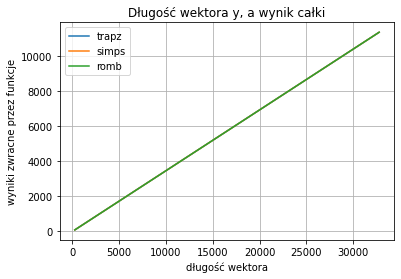

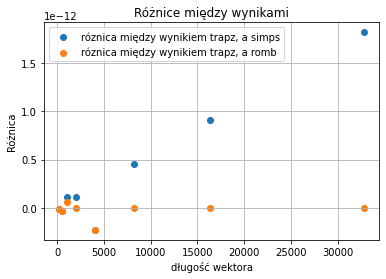

In [415]:
trap = []
simp = []
rom = []


for n in N:

    x = np.linspace(0, np.pi/4, n)
    y = f(x)

    trap.append(sci.trapz(y))
    simp.append(sci.simps(y))
    rom.append(sci.romb(y))

plt.plot(N, trap, label = "trapz")
plt.plot(N, simp, label = "simps")
plt.plot(N, rom, label = "romb")
plt.grid()
plt.title("Długość wektora y, a wynik całki")
plt.legend()
plt.xlabel("długość wektora")
plt.ylabel("wyniki zwracne przez funkcje")
plt.show()

plt.title("Różnice między wynikami")
plt.scatter(N, np.array(trap) - np.array(simp), label = "róznica między wynikiem trapz, a simps")
plt.scatter(N, np.array(trap) - np.array(rom), label = "róznica między wynikiem trapz, a romb")
plt.grid()
plt.xlabel("długość wektora")
plt.ylabel("Różnica")
plt.legend()

    

Jak widać, wyniki zastosowania powyższych funkcji mocno mijają się z rzeczywistością.
Dzieje się tak dlatego, że zwiększamy ilość punktów, nie zmiejszając w funkcjach wartości dx, która
to jest odpowiedzialna za odległość między następnymi punktami. Wszystkie 3 funkcje na
wejściu przyjmują wektor wartości funkcji całkowanej y, z założeniem, że każdy z elementów wektora jest odległy
od następnego o 1, dlatego zwiększając długość wektora y, zwiększamy liniowo wynik zwracany
przez trzy powyższe metody - punkty mają te same wartości, ale dla funkcji są bardziej "rozciągnięte"
w przestrzeni.

Można też zauważyć, że róznice wyników tych trzech funkcji są bardzo znikome - wszystkie są
na poziomie 1e-12

***Zależość parametru dx, a wyniku całki***

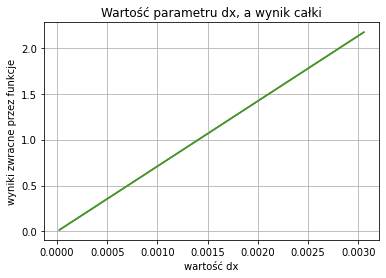

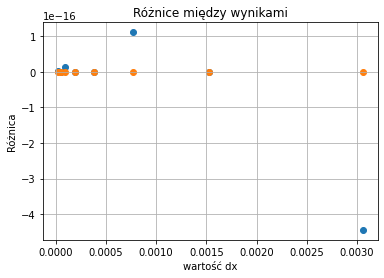

In [416]:
trap = []
simp = []
rom = []

x = np.linspace(0, np.pi/4, 2**11 + 1)
y = f(x)
Dx = []

for n in N:

    dx = np.pi/(4*n)
    Dx.append(dx)
    trap.append(sci.trapz(y, dx = dx))
    simp.append(sci.simps(y, dx = dx))
    rom.append(sci.romb(y, dx = dx))

plt.plot(Dx, trap, label = "trapz")
plt.plot(Dx, simp, label = "simps")
plt.plot(Dx, rom, label = "romb")
plt.title("Wartość parametru dx, a wynik całki")
plt.xlabel("wartość dx")
plt.ylabel("wyniki zwracne przez funkcje")
plt.grid()
plt.show()

plt.title("Różnice między wynikami")
plt.scatter(Dx, np.array(trap) - np.array(simp), label = "róznica między wynikiem trapz, a simps")
plt.scatter(Dx, np.array(trap) - np.array(rom),label = "róznica między wynikiem trapz, a romb")
plt.xlabel("wartość dx")
plt.ylabel("Różnica")
plt.grid()

Sytuacja jest bardzo podobna do poprzedniej - znów kroki między następnymi wartościami y się nie zgadzają, i znów
zwiększając parametr (którym tym razem jest dx, a nie długość wektora) rozszerzamy, bądź kurczymy figurę, którą
dane punkty powinny nam tworzyć. Aby funkcje odpowiednio działały, konieczne jest odpowiednie dopasowanie
punktów y do kroku dx.

Różnice między poszczególymi wynikami są jeszcze mniejsze niż poprzednio - tym razem są już
na poziomie zera maszynowego

***Działanie funkcji trapz, simps oraz romb z odpowiednio dopasowanymi parametrami***

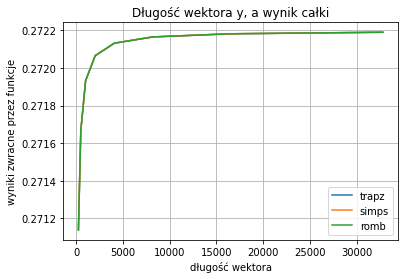

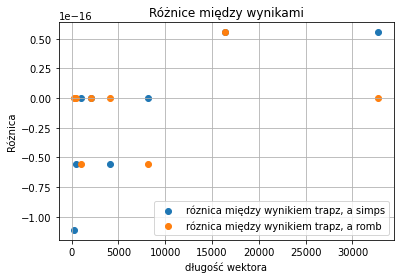

In [417]:
trap = []
simp = []
rom = []

for n in N:

    x = np.linspace(0, np.pi/4, n)
    y = f(x)
    dx = np.pi/(4*n)
    
    trap.append(sci.trapz(y, dx = dx))
    simp.append(sci.simps(y, dx = dx))
    rom.append(sci.romb(y, dx = dx))

plt.plot(N, trap, label = "trapz")
plt.plot(N, simp, label = "simps")
plt.plot(N, rom, label = "romb")
plt.grid()
plt.title("Długość wektora y, a wynik całki")
plt.legend()
plt.xlabel("długość wektora")
plt.ylabel("wyniki zwracne przez funkcje")
plt.show()

plt.title("Różnice między wynikami")
plt.scatter(N, np.array(trap) - np.array(simp), label = "róznica między wynikiem trapz, a simps")
plt.scatter(N, np.array(trap) - np.array(rom), label = "róznica między wynikiem trapz, a romb")
plt.grid()
plt.xlabel("długość wektora")
plt.ylabel("Różnica")
plt.legend()

Wreszcie funkcje zachowują się sensownie. Wraz z wydłużeniem wektora y, zmniejszamy krok dx, zwiększając
też i dokładność, co widzimy na wykresie pierwszym. (Należy zauważyć jednak też, że dolna wartość
wykresu to 0.2712 która to już jest dobrym przybliżeniem całki, aczkolwiek wraz ze wzrostem n wyliczona wartość całki
coraz bardziej zbliża się do wartości 0,2722, która to zapewne jest najbliża rzeczywistości)

Jak zwykle, trzy poyższe funkcje dla tych samych paramerów dają bardzo zbliżone wyniki - różnice między nimi znów są na poziomie zera maszynowego

***Część 3***

In [418]:

x = np.linspace(0, np.pi/4, 2**14 +1)
y = f(x)

trap = sci.trapz(y,dx = np.pi/(4*(2**14 +1)))
simp = sci.simps(y,dx =np.pi/(4*(2**14 +1)))
rom = sci.romb(y,dx = np.pi/(4*(2**14 +1)))
qua = sci.quad(f, 0, np.pi/4)
berg = sci.romberg(f, 0, np.pi/4)
rature = sci.quadrature(f, 0, np.pi/4)

print("Całka obliczona za pomocą funkcji trapz: {}\n".format(trap))
print("Całka obliczona za pomocą funkcji simps: {}\n".format(simp))
print("Całka obliczona za pomocą funkcji romb: {}\n".format(rom))
print("Całka obliczona za pomocą funkcji quad: {}".format(qua[0]))
print("Szacowany błąd wyniku zwrócony przez funkcję quad: {}\n".format(qua[1]))
print("Całka obliczona za pomocą funkcji romberg: {}\n".format(berg))
print("Całka obliczona za pomocą funkcji quadrature: {}".format(rature[0]))
print("Szacowany błąd wyniku zwrócony przez funkcję rature: {}".format(rature[1]))

Całka obliczona za pomocą funkcji trapz: 0.27218164863849725

Całka obliczona za pomocą funkcji simps: 0.2721816486384972

Całka obliczona za pomocą funkcji romb: 0.2721816486384972

Całka obliczona za pomocą funkcji quad: 0.27219826128795027
Szacowany błąd wyniku zwrócony przez funkcję quad: 3.022007769448168e-15

Całka obliczona za pomocą funkcji romberg: 0.27219826128795016

Całka obliczona za pomocą funkcji quadrature: 0.27219826128795027
Szacowany błąd wyniku zwrócony przez funkcję rature: 5.551115123125783e-17


Jako że szacowany błąd funckcji quadrature jest na poziomie zera maszynowego, wyniki innych metod zostały
porównane właśnie z wynikiem funkcji quadrature.

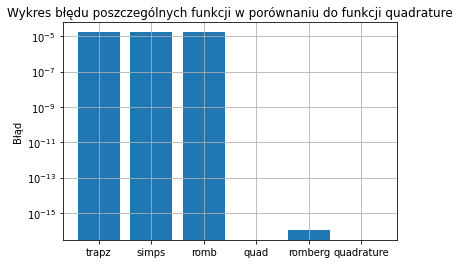

In [419]:
labels = [ 'trapz', 'simps', 'romb','quad','romberg', 'quadrature']
roznice = np.abs(np.array(rature[0]) - np.array([trap, simp, rom, qua[0], berg, rature[0]]))
x_val = np.arange(6)
plt.bar(x_val, roznice)
plt.xticks(x_val, labels)
plt.yscale("log")
plt.title("Wykres błędu poszczególnych funkcji w porównaniu do funkcji quadrature")
plt.ylabel("Błąd")
plt.grid()
plt.show()

In [420]:
print("Trapz:")
trap_time = %timeit -r 50 -n 50 -o sci.trapz(y,dx = np.pi/(4*(2**14 +1)))
print("\nSimps:")
simps_time = %timeit -r 50 -n 50 -o sci.simps(y,dx =np.pi/(4*(2**14 +1)))
print("\nRomb:")
romb_time = %timeit -r 50 -n 50 -o sci.romb(y,dx = np.pi/(4*(2**14 +1)))
print("\nQuad:")
quad_time = %timeit -r 50 -n 50 -o sci.quad(f, 0, np.pi/4)
print("\nRomberg:")
romberg_time = %timeit -r 50 -n 50 -o sci.romberg(f, 0, np.pi/4)
print("\nQuadrature:")
quadrature_time = %timeit -r 50 -n 50 -o sci.quadrature(f, 0, np.pi/4)

Trapz:
24.8 µs ± 3.83 µs per loop (mean ± std. dev. of 50 runs, 50 loops each)

Simps:
22.9 µs ± 1.83 µs per loop (mean ± std. dev. of 50 runs, 50 loops each)

Romb:
127 µs ± 2.05 µs per loop (mean ± std. dev. of 50 runs, 50 loops each)

Quad:
50.8 µs ± 5.3 µs per loop (mean ± std. dev. of 50 runs, 50 loops each)

Romberg:
33.1 µs ± 6.34 µs per loop (mean ± std. dev. of 50 runs, 50 loops each)

Quadrature:
34.6 µs ± 10.5 µs per loop (mean ± std. dev. of 50 runs, 50 loops each)


Różnica między wartościami zwracanymi przez funkcje quad, romberg i quadrature są
na poziomie zera maszynowego. Dla zadanej dokładności funkcję trapz, simps i romb dają
nam wynki rożniące się nawet o 10 rzędów wartości, co jest w sumie ciekawe, bo
funkcja romb i romberg obydwie implementują tą samą metodę obliczania całki.

Funkcje trapz oraz simps dla zadanej dokładności okazały się najszybsze, a romb najwolniejszy, mimo że
zbiega do tej samej wartości co dwie poprzednie funkcje. Wydaje mi się, że stosowanie
funcji quad, romberg i quadrature jest bezpieczniejszym rozwiązaniem, niż trzech wyżej wymienionych,
gdyż trudniej o zakłamanie wyniku - nie trzeba pilnować aby długość wektra y i dx zgadzały się.
Wystarczy jedynie znać funkcję oraz przedział. I na dodatek nie są wiele wolniejsze od trapz oraz simps
(i nawet są dużo szybsze od funkcji romb). Jedynym problemem jest właśnie znanie wzoru na funkcję -
jeśli mamy jakiś zbiór puntów i wartości - Czy opłaca się korzystać z pierwszych trzech funkcji
niż wyznaczać przybliżenie tej funkcji i dopiero wtedy korzystać z dokładniejszych metod?

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

In [421]:
N = [2**8 + 1, 2**9 + 1, 2**10 + 1, 2**11 + 1, 2**12 + 1, 2**13 + 1, 2**14 + 1, 2**15 + 1]
f = lambda x: np.exp(x**2)

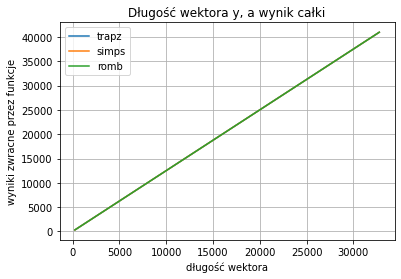

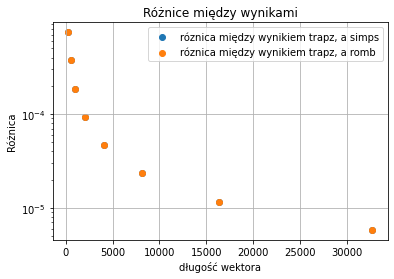


wartości trapz:
[320.0007282055004, 640.000340129428, 1280.0001221173743, 2559.999965163921, 5119.999790792417, 10239.999511817121, 20479.998988750387, 40959.99796005885]

wartości simps:
[319.999984021492, 639.9999680355704, 1279.9999360702138, 2559.999872140312, 5119.999744280609, 10239.999488561216, 20479.998977122432, 40959.997954244864]

wartości romb:
[319.99998401753805, 639.9999680350762, 1279.999936070152, 2559.999872140304, 5119.999744280608, 10239.999488561216, 20479.998977122432, 40959.997954244864]


In [422]:
trap = []
simp = []
rom = []


for n in N:

    x = np.linspace(0, np.pi/4, n)
    y = f(x)

    trap.append(sci.trapz(y))
    simp.append(sci.simps(y))
    rom.append(sci.romb(y))

plt.plot(N, trap, label = "trapz")
plt.plot(N, simp, label = "simps")
plt.plot(N, rom, label = "romb")
plt.grid()
plt.title("Długość wektora y, a wynik całki")
plt.legend()
plt.xlabel("długość wektora")
plt.ylabel("wyniki zwracne przez funkcje")
plt.show()

plt.title("Różnice między wynikami")
plt.scatter(N, abs(np.array(trap) - np.array(simp)), label = "róznica między wynikiem trapz, a simps")
plt.scatter(N, abs(np.array(trap) - np.array(rom)), label = "róznica między wynikiem trapz, a romb")
plt.grid()
plt.yscale('log')
plt.xlabel("długość wektora")
plt.ylabel("Różnica")
plt.legend()
plt.show()

print("\nwartości trapz:")
print(trap)
print("\nwartości simps:")
print(simp)
print("\nwartości romb:")
print(rom)


Zachowanie analogiczne do poprzedniego przykadu z jedną różnicą - różnice między wynikiem funkcji
trapz, a pozostałymi dwoma, w porównaniu do ostatniej funkcji, są dużo większe i maleją wraz z wydłużeniem
 wektora.

***Zależość parametru dx, a wyniku całki***

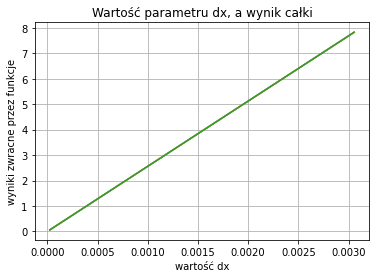

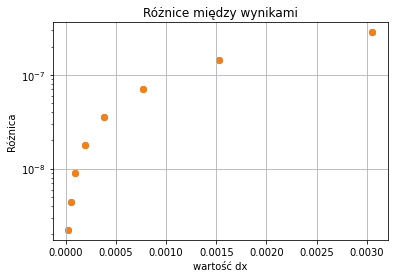


wartości trapz:
[7.823421287693677, 3.9193358107939096, 1.961579776524171, 0.9812685558503053, 0.49075403244746774, 0.24540696581682842, 0.12271097167758775, 0.061357358202486355]

wartości simps:
[7.8234210034112985, 3.9193356683756404, 1.9615797052455644, 0.9812685201936086, 0.4907540146147678, 0.24540695689939016, 0.1227109672185965, 0.06135735597292269]

wartości romb:
[7.823421003411273, 3.919335668375628, 1.961579705245558, 0.9812685201936053, 0.49075401461476625, 0.24540695689938935, 0.1227109672185961, 0.061357355972922495]


In [423]:
trap = []
simp = []
rom = []

x = np.linspace(0, np.pi/4, 2**11 + 1)
y = f(x)
Dx = []

for n in N:

    dx = np.pi/(4*n)
    Dx.append(dx)
    trap.append(sci.trapz(y, dx = dx))
    simp.append(sci.simps(y, dx = dx))
    rom.append(sci.romb(y, dx = dx))

plt.plot(Dx, trap, label = "trapz")
plt.plot(Dx, simp, label = "simps")
plt.plot(Dx, rom, label = "romb")
plt.title("Wartość parametru dx, a wynik całki")
plt.xlabel("wartość dx")
plt.ylabel("wyniki zwracne przez funkcje")
plt.grid()
plt.show()

plt.title("Różnice między wynikami")
plt.scatter(Dx, abs(np.array(trap) - np.array(simp)), label = "róznica między wynikiem trapz, a simps")
plt.scatter(Dx, abs(np.array(trap) - np.array(rom)),label = "róznica między wynikiem trapz, a romb")
plt.xlabel("wartość dx")
plt.ylabel("Różnica")
plt.grid()
plt.yscale('log')
plt.show()

print("\nwartości trapz:")
print(trap)
print("\nwartości simps:")
print(simp)
print("\nwartości romb:")
print(rom)

Ponownie różnica między wynikiem trapz, a simps i romb jest większa niż poprzednio, lecz tym razem
rośnie wraz ze wzrostem dx (co ma sens, bo wzrost dx powoduje zmiejszenie dokładności - tak jak zmiejszene długości y)

***Działanie funkcji trapz, simps oraz romb z odpowiednio dopasowanymi parametrami***

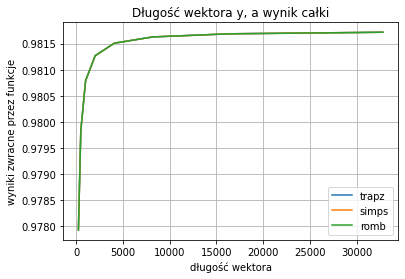

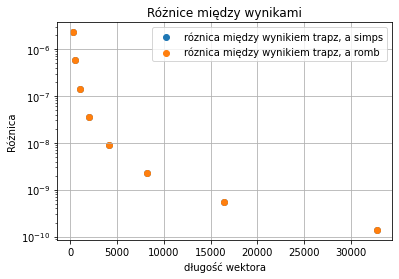


wartości trapz:
[0.9779298996826693, 0.9798344867668517, 0.9807899951799954, 0.9812685558503053, 0.9815080381458835, 0.9816278298269174, 0.9816877383061429, 0.9817176957061078]

wartości simps:
[0.9779276254384929, 0.9798339170946639, 0.9807898526228265, 0.9812685201936086, 0.9815080292295327, 0.9816278275975575, 0.9816877377487689, 0.9817176955667599]

wartości romb:
[0.9779276254264092, 0.979833917093907, 0.9807898526227792, 0.9812685201936053, 0.9815080292295325, 0.9816278275975575, 0.9816877377487689, 0.98171769556676]


In [424]:
trap = []
simp = []
rom = []

for n in N:

    x = np.linspace(0, np.pi/4, n)
    y = f(x)
    dx = np.pi/(4*n)

    trap.append(sci.trapz(y, dx = dx))
    simp.append(sci.simps(y, dx = dx))
    rom.append(sci.romb(y, dx = dx))

plt.plot(N, trap, label = "trapz")
plt.plot(N, simp, label = "simps")
plt.plot(N, rom, label = "romb")
plt.grid()
plt.title("Długość wektora y, a wynik całki")
plt.legend()
plt.xlabel("długość wektora")
plt.ylabel("wyniki zwracne przez funkcje")
plt.show()

plt.title("Różnice między wynikami")
plt.scatter(N, np.array(trap) - np.array(simp), label = "róznica między wynikiem trapz, a simps")
plt.scatter(N, np.array(trap) - np.array(rom), label = "róznica między wynikiem trapz, a romb")
plt.grid()
plt.xlabel("długość wektora")
plt.ylabel("Różnica")
plt.yscale('log')
plt.legend()
plt.show()

print("\nwartości trapz:")
print(trap)
print("\nwartości simps:")
print(simp)
print("\nwartości romb:")
print(rom)


Wraz ze wzrostem dokładności, różnica między metodami trapz, a simps i romb maleje.

***Część 3***

In [425]:

x = np.linspace(0, np.pi/4, 2**14 +1)
y = f(x)

trap = sci.trapz(y,dx = np.pi/(4*(2**14 +1)))
simp = sci.simps(y,dx =np.pi/(4*(2**14 +1)))
rom = sci.romb(y,dx = np.pi/(4*(2**14 +1)))
qua = sci.quad(f, 0, np.pi/4)
berg = sci.romberg(f, 0, np.pi/4)
rature = sci.quadrature(f, 0, np.pi/4)

print("Całka obliczona za pomocą funkcji trapz: {}\n".format(trap))
print("Całka obliczona za pomocą funkcji simps: {}\n".format(simp))
print("Całka obliczona za pomocą funkcji romb: {}\n".format(rom))
print("Całka obliczona za pomocą funkcji quad: {}".format(qua[0]))
print("Szacowany błąd wyniku zwrócony przez funkcję quad: {}\n".format(qua[1]))
print("Całka obliczona za pomocą funkcji romberg: {}\n".format(berg))
print("Całka obliczona za pomocą funkcji quadrature: {}".format(rature[0]))
print("Szacowany błąd wyniku zwrócony przez funkcję rature: {}".format(rature[1]))

Całka obliczona za pomocą funkcji trapz: 0.9816877383061429

Całka obliczona za pomocą funkcji simps: 0.9816877377487689

Całka obliczona za pomocą funkcji romb: 0.9816877377487689

Całka obliczona za pomocą funkcji quad: 0.9817476552132313
Szacowany błąd wyniku zwrócony przez funkcję quad: 1.0899588511894889e-14

Całka obliczona za pomocą funkcji romberg: 0.9817476552132957

Całka obliczona za pomocą funkcji quadrature: 0.9817476551901329
Szacowany błąd wyniku zwrócony przez funkcję rature: 3.028743367217146e-09


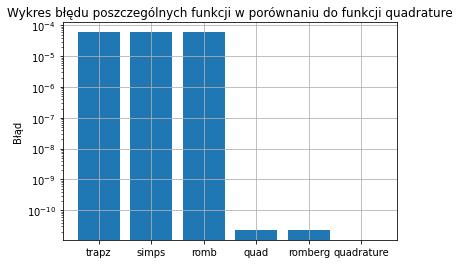

In [426]:
labels = [ 'trapz', 'simps', 'romb','quad','romberg', 'quadrature']
roznice = np.abs(np.array(rature[0]) - np.array([trap, simp, rom, qua[0], berg, rature[0]]))
x_val = np.arange(6)
plt.bar(x_val, roznice)
plt.xticks(x_val, labels)
plt.yscale("log")
plt.title("Wykres błędu poszczególnych funkcji w porównaniu do funkcji quadrature")
plt.ylabel("Błąd")
plt.grid()
plt.show()

In [427]:
print("Trapz:")
trap_time = %timeit -r 50 -n 50 -o sci.trapz(y,dx = np.pi/(4*(2**14 +1)))
print("\nSimps:")
simps_time = %timeit -r 50 -n 50 -o sci.simps(y,dx =np.pi/(4*(2**14 +1)))
print("\nRomb:")
romb_time = %timeit -r 50 -n 50 -o sci.romb(y,dx = np.pi/(4*(2**14 +1)))
print("\nQuad:")
quad_time = %timeit -r 50 -n 50 -o sci.quad(f, 0, np.pi/4)
print("\nRomberg:")
romberg_time = %timeit -r 50 -n 50 -o sci.romberg(f, 0, np.pi/4)
print("\nQuadrature:")
quadrature_time = %timeit -r 50 -n 50 -o sci.quadrature(f, 0, np.pi/4)

Trapz:
24.7 µs ± 3.42 µs per loop (mean ± std. dev. of 50 runs, 50 loops each)

Simps:
23.5 µs ± 2.09 µs per loop (mean ± std. dev. of 50 runs, 50 loops each)

Romb:
134 µs ± 12.6 µs per loop (mean ± std. dev. of 50 runs, 50 loops each)

Quad:
23.2 µs ± 2.44 µs per loop (mean ± std. dev. of 50 runs, 50 loops each)

Romberg:
144 µs ± 29.3 µs per loop (mean ± std. dev. of 50 runs, 50 loops each)

Quadrature:
103 µs ± 24.5 µs per loop (mean ± std. dev. of 50 runs, 50 loops each)


Dla tego przykładu różnica między czasami funkcji quadrature i romberg, a czasami trapz i simps okazały
się spore. Aż 4,5 razy większe. Romb dalej jednak pozostaje jedną z najwolniejszych metod.

Pozostałe funkcje mają zbliżone czasy.
Wartości zwracane przez funkcje zachowaują się analogicznie do poprzedniego przykładu.
